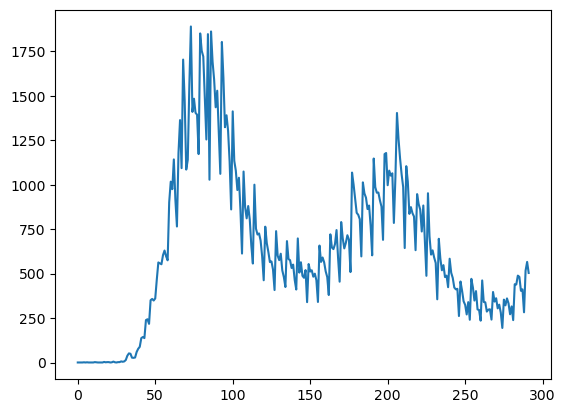

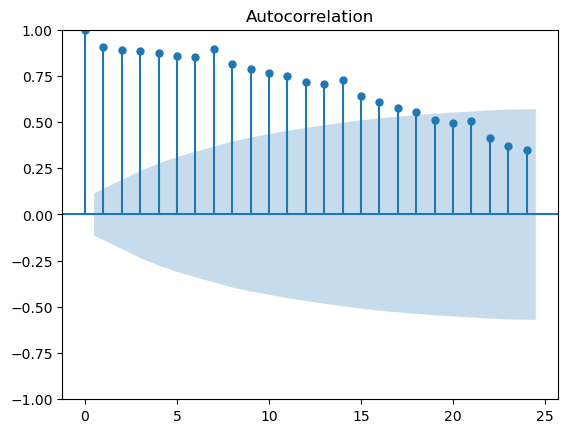

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


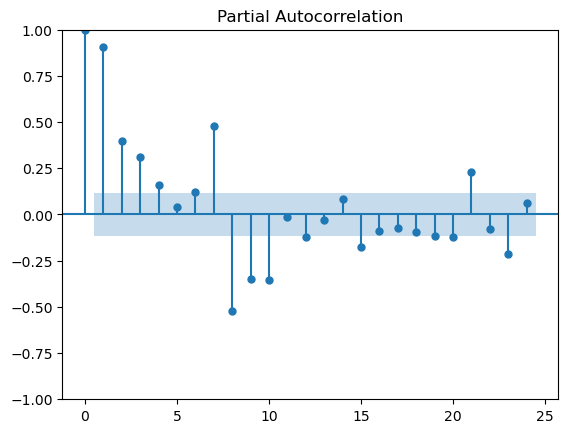

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\雲林縣每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Yunlin.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Yunlin_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Yunlin_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\雲林縣每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        1
2        1
3        1
4        2
..     ...
288    283
289    517
290    566
291    504
292    468

[293 rows x 1 columns]
293


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 12s 102ms/step - loss: 0.1493 - mse: 0.1493 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3/1000
27/27 [=============================

27/27 [==============================] - 0s 8ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 57/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 58/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 59/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 60/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 61/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 62/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 63/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0206 -

27/27 [==============================] - 0s 8ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 118/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 119/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 120/1000
27/27 [==============================] - 0s 13ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 121/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 122/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 123/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 124/1000
27/27 [==============================] - 0s 13ms/step - loss:

27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 179/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 180/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 181/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 182/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 183/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 184/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 185/1000
27/27 [==============================] - 0s 8ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 240/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 241/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 242/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 243/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 244/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 245/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 246/1000
27/27 [==============================] - 0s 8ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 301/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 302/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 303/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 304/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 305/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 306/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 307/1000
27/27 [==============================] - 0s 9ms/step - loss: 0

27/27 [==============================] - 1s 27ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 362/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 363/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 364/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 365/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 366/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 367/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 368/1000
27/27 [==============================] - 0s 8ms/step - loss: 

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 423/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 424/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 425/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 426/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 427/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 428/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 429/1000
27/27 [==============================] - 0s 8ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 484/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 485/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 486/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 487/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 488/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 489/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 490/1000
27/27 [==============================] - 0s 8ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 545/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 546/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 547/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 548/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 549/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 550/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 551/1000
27/27 [==============================] - 0s 8ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 606/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 607/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 608/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 609/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 610/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 611/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 612/1000
27/27 [==============================] - 0s 8ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 667/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 668/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 669/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 670/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 671/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 672/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 673/1000
27/27 [==============================] - 0s 8ms/step - loss: 0

27/27 [==============================] - 0s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 728/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 729/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 730/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 731/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 732/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 733/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 734/1000
27/27 [==============================] - 0s 7ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 789/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 790/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 791/1000
27/27 [==============================] - 0s 12ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 792/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 793/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 794/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 795/1000
27/27 [==============================] - 0s 8ms/step - loss: 

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 850/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 851/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 852/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 853/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 854/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 855/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 856/1000
27/27 [==============================] - 0s 8ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 911/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 912/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 913/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 914/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 915/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 916/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 917/1000
27/27 [==============================] - 0s 8ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 972/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 973/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 974/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 975/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 976/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 977/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 978/1000
27/27 [==============================] - 0s 8ms/step - loss: 0

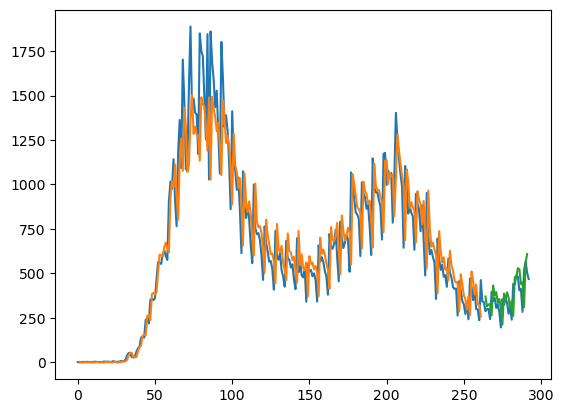

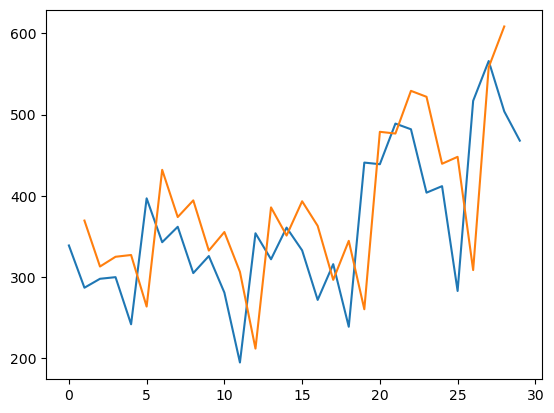

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="yunlin_rnn+lstm_1000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('yunlin_rnn+lstm_1000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('yunlin_rnn+lstm_1000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("yunlin_rnn+lstm_1000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 12s 92ms/step - loss: 0.1393 - mse: 0.1393 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0730 - mse: 0.0730 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 3/1000
27/27 [==========================

27/27 [==============================] - 0s 8ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 57/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 58/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 59/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 60/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 61/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 62/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 63/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0207 

27/27 [==============================] - 0s 9ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 118/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 119/1000
27/27 [==============================] - 0s 11ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 120/1000
27/27 [==============================] - 0s 15ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 121/1000
27/27 [==============================] - 0s 13ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 122/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 123/1000
27/27 [==============================] - 0s 11ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 124/1000
27/27 [==============================] - 0s 14ms/step - 

Epoch 178/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 179/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 180/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 181/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 182/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 183/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 184/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 185/1000
27/27 [==============================] - 0s 8ms

Epoch 239/1000
27/27 [==============================] - 0s 11ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 240/1000
27/27 [==============================] - 0s 12ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 241/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 242/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 243/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 244/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 245/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 246/1000
27/27 [==============================] - 0

Epoch 300/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 301/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 302/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 303/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 304/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 305/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 306/1000
27/27 [==============================] - 0s 12ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 307/1000
27/27 [==============================] - 0s 9

Epoch 361/1000
27/27 [==============================] - 1s 51ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 362/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 363/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 364/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 365/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 366/1000
27/27 [==============================] - 0s 12ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 367/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 368/1000
27/27 [==============================] - 0s 

27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 423/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 424/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 425/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 426/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 427/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 428/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 429/1000
27/27 [==============================] - 0s 7ms/step - loss: 0

27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 484/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 485/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 486/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 487/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 488/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 489/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 490/1000
27/27 [==============================] - 0s 9ms/step - loss: 0

27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 545/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 546/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 547/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 548/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 549/1000
27/27 [==============================] - 0s 12ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 550/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 551/1000
27/27 [==============================] - 0s 9ms/step - loss: 

27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 606/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 607/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 608/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 609/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 610/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 611/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 612/1000
27/27 [==============================] - 0s 9ms/step - loss: 0

27/27 [==============================] - 0s 10ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 667/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 668/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 669/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 670/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 671/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 672/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 673/1000
27/27 [==============================] - 0s 9ms/step - loss: 

27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 728/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 729/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 730/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 731/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 732/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 733/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 734/1000
27/27 [==============================] - 0s 9ms/step - loss: 0

27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 789/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 790/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 791/1000
27/27 [==============================] - 1s 25ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 792/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 793/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 794/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 795/1000
27/27 [==============================] - 0s 9ms/step - loss:

27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 850/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 851/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 852/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 853/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 854/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 855/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 856/1000
27/27 [==============================] - 0s 9ms/step - loss: 0

27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 911/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 912/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 913/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 914/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 915/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 916/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 917/1000
27/27 [==============================] - 0s 11ms/step - loss

27/27 [==============================] - 0s 10ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 972/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 973/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 974/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 975/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 976/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 977/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 978/1000
27/27 [==============================] - 0s 9ms/step - loss: 

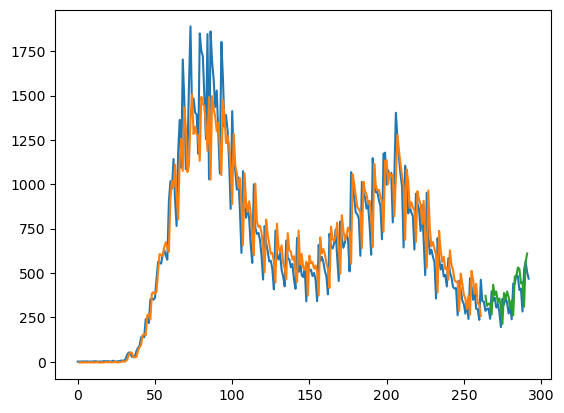

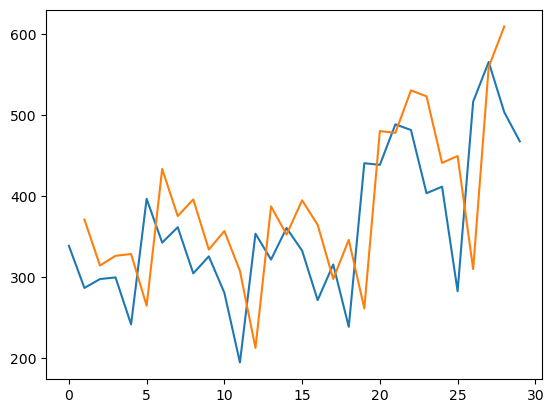

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="yunlin_rnn+lstm_1000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('yunlin_rnn+lstm_1000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('yunlin_rnn+lstm_1000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("yunlin_rnn+lstm_1000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

27/27 [==============================] - 0s 10ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 54/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 55/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 56/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 57/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 58/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 59/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 60/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0115

27/27 [==============================] - 0s 10ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 115/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 116/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 117/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 118/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 119/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 120/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 121/1000
27/27 [==============================] - 0s 9ms/step - loss:

27/27 [==============================] - 0s 9ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 176/1000
27/27 [==============================] - 1s 19ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 177/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 178/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 179/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 180/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 181/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 182/1000
27/27 [==============================] - 0s 11ms/step - loss:

27/27 [==============================] - 0s 9ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 237/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 238/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 239/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 240/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 241/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 242/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 243/1000
27/27 [==============================] - 0s 9ms/step - loss: 0

27/27 [==============================] - 0s 10ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 298/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 299/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 300/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 301/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 302/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 303/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 304/1000
27/27 [==============================] - 0s 9ms/step - loss: 

27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 359/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 360/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 361/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 362/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 363/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 364/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 365/1000
27/27 [==============================] - 0s 9ms/step - loss: 

27/27 [==============================] - 0s 10ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 420/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 421/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 422/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 423/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 424/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 425/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 426/1000
27/27 [==============================] - 0s 9ms/step - loss: 

27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 481/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 482/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 483/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 484/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 485/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 486/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 487/1000
27/27 [==============================] - 0s 9ms/step - loss: 0

27/27 [==============================] - 0s 10ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 542/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 543/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 544/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 545/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 546/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 547/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 548/1000
27/27 [==============================] - 0s 10ms/step - los

27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 603/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 604/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 605/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 606/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 607/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 608/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 609/1000
27/27 [==============================] - 0s 9ms/step - loss:

27/27 [==============================] - 0s 10ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 664/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 665/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 666/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 667/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 668/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 669/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 670/1000
27/27 [==============================] - 0s 9ms/step - loss: 

27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 725/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 726/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 727/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 728/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 729/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 730/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 731/1000
27/27 [==============================] - 0s 9ms/step - loss: 

27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 786/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 787/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 788/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 789/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 790/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 791/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 792/1000
27/27 [==============================] - 0s 9ms/step - loss: 

27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 847/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 848/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 849/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 850/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 851/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 852/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 853/1000
27/27 [==============================] - 0s 9ms/step - loss: 

27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 908/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 909/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 910/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 911/1000
27/27 [==============================] - 0s 11ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 912/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 913/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 914/1000
27/27 [==============================] - 0s 9ms/step - los

27/27 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 969/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 970/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 971/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 972/1000
27/27 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 973/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 974/1000
27/27 [==============================] - 0s 10ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 975/1000
27/27 [==============================] - 0s 9ms/step - loss:

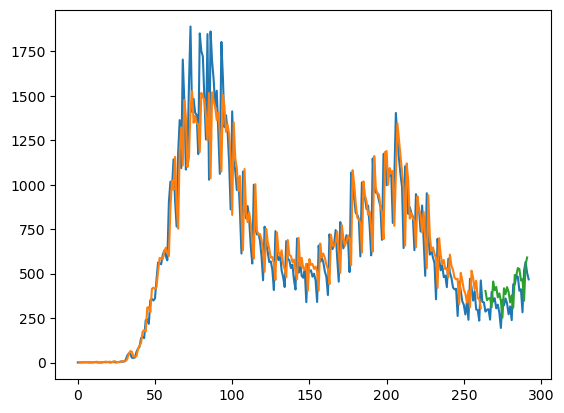

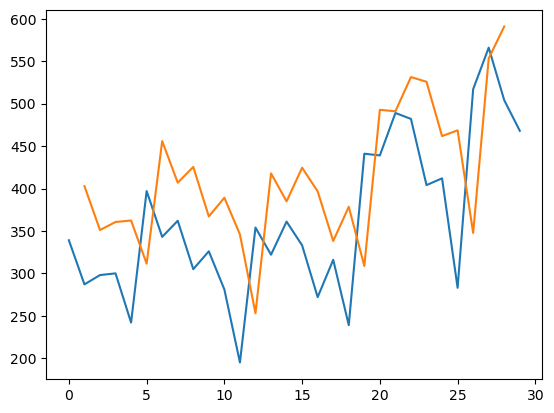

In [5]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="yunlin_rnn+lstm_1000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('yunlin_rnn+lstm_1000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('yunlin_rnn+lstm_1000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("yunlin_rnn+lstm_1000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_6 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)            

Epoch 51/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0555 - mse: 0.0555 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 52/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 53/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0553 - mse: 0.0553 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 54/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 55/1000
261/261 [==============================] - 2s 7ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 56/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 57/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0541 - mse: 0.0541 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 58/1000
261/261 [==============================] 

261/261 [==============================] - 2s 6ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 112/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 113/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 114/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 115/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 116/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 117/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 118/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 172/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 173/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 174/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 175/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 176/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 177/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 178/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 232/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 233/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 234/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 235/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 236/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 237/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 238/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 292/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 293/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 294/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 295/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 296/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 297/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 298/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 352/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 353/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 354/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 355/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 356/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 357/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 358/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 412/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 413/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 414/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 415/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 416/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 417/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 418/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 472/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 473/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 474/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 475/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 476/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 477/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 478/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 532/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 533/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 534/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 535/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 536/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 537/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 538/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 592/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 593/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 594/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 595/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 596/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 597/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 598/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 652/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 653/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 654/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 655/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 656/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 657/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 658/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 712/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 713/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 714/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 715/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 716/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 717/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 718/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 772/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 773/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 774/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 775/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 776/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 777/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 778/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 832/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 833/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 834/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 835/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 836/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 837/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 838/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 892/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 893/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 894/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 895/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 896/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 897/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 898/1000
261/261 [==============================] - 2s 6m

261/261 [==============================] - 2s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 952/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 953/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 954/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 955/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 956/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 957/1000
261/261 [==============================] - 2s 6ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 958/1000
261/261 [==============================] - 2s 6m

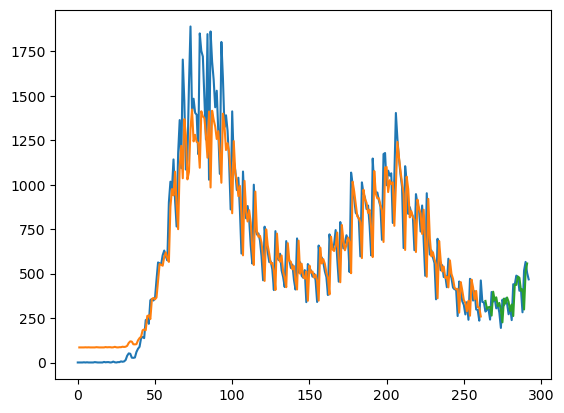

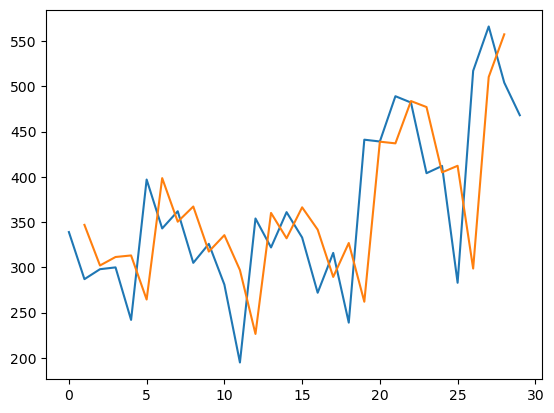

In [6]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="yunlin_rnn+lstm_1000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('yunlin_rnn+lstm_1000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('yunlin_rnn+lstm_1000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("yunlin_rnn+lstm_1000_predict&real_4.png")
plt.show()